In [1]:
import numpy as np
import matplotlib.pyplot as plt

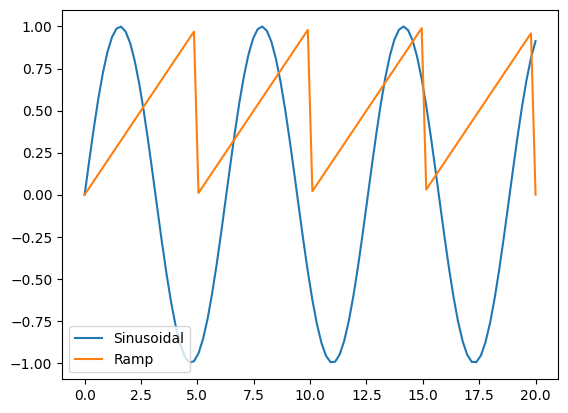

In [9]:
x = np.linspace(0, 20, 100)
A = np.sin(x)
B = (x % 5) / 5

plt.plot(x, A, label="Sinusoidal")
plt.plot(x, B, label="Ramp")
plt.legend()
plt.show()